# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [35]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:
# Set the API base URL
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(query_url + city).json()
    #pprint(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url
        #city_weather

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carahue
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | al qusayr
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | crane
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | roxas
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | cambria
Processing Record 11 of Set 1 | aljezur
Processing Record 12 of Set 1 | khandyga
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | dalai
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | balaklava
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | saguenay
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | shiqian
Processing Record 22 of Set 1 | west island
Processing Record 23 

In [47]:
# Convert the cities weather data into a Pandas DataFrame
#type(city_data)
#print(city_data)
city_data_df = pd.DataFrame(city_data)
#city_data_df
# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [62]:

# Convert the "Date" column to datetime objects
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s')  # 's' for seconds

# Change the date format
city_data_df["Date"] = city_data_df["Date"].dt.strftime('%Y-%m-%d %H:%M:%S')  # Change the format as needed

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carahue,-38.7000,-73.1667,9.80,91,0,1.14,CL,2023-09-29 23:26:49
1,yellowknife,62.4560,-114.3525,7.45,65,75,2.57,CA,2023-09-29 23:26:50
2,ushuaia,-54.8000,-68.3000,9.81,46,0,4.63,AR,2023-09-29 23:26:50
3,al qusayr,34.5091,36.5798,20.13,60,6,3.47,SY,2023-09-29 23:26:50
4,edinburgh of the seven seas,-37.0676,-12.3116,10.58,85,100,15.26,SH,2023-09-29 23:26:50


In [63]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities1.csv", index_label="City_ID")

In [64]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carahue,-38.7000,-73.1667,9.80,91,0,1.14,CL,2023-09-29 23:26:49
1,yellowknife,62.4560,-114.3525,7.45,65,75,2.57,CA,2023-09-29 23:26:50
2,ushuaia,-54.8000,-68.3000,9.81,46,0,4.63,AR,2023-09-29 23:26:50
3,al qusayr,34.5091,36.5798,20.13,60,6,3.47,SY,2023-09-29 23:26:50
4,edinburgh of the seven seas,-37.0676,-12.3116,10.58,85,100,15.26,SH,2023-09-29 23:26:50


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

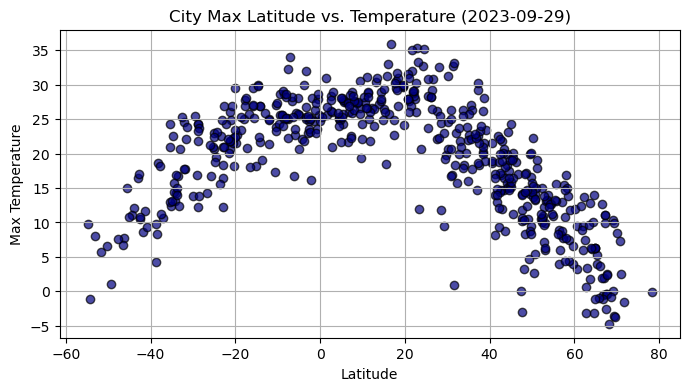

In [71]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 4))  # Set the size of the plot (optional)

# Create the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="navy", edgecolors="black", alpha=0.7)

# Add labels and a title
from datetime import datetime #today's date
# Get today's date
today_date = datetime.now().date()
# Format today's date as "YYYY-MM-DD"
formatted_date = today_date.strftime('%Y-%m-%d')

plt.title(f"City Max Latitude vs. Temperature ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Add grid lines (optional)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1-JH.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

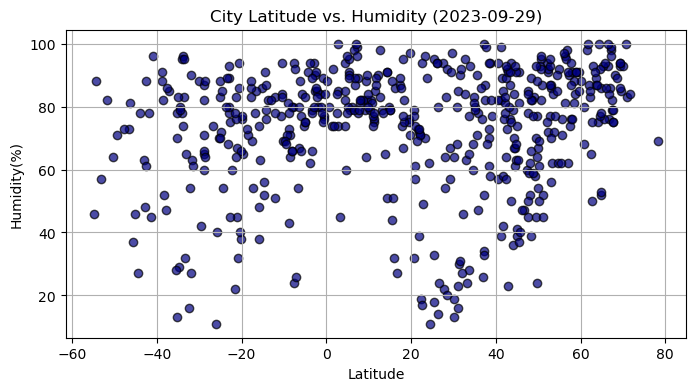

In [72]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 4))  # Set the size of the plot (optional)

# Create the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="navy", edgecolors="black", alpha=0.7)

# Add labels and a title
from datetime import datetime #today's date
# Get today's date
today_date = datetime.now().date()
# Format today's date as "YYYY-MM-DD"
formatted_date = today_date.strftime('%Y-%m-%d')

plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Add grid lines (optional)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2-JH.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

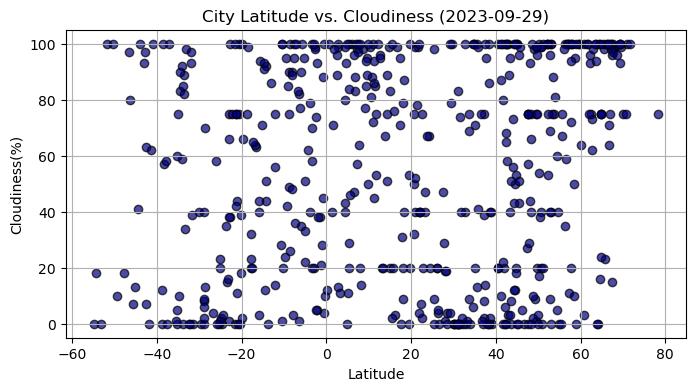

In [74]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 4))  # Set the size of the plot (optional)

# Create the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="navy", edgecolors="black", alpha=0.7)

# Add labels and a title
from datetime import datetime #today's date
# Get today's date
today_date = datetime.now().date()
# Format today's date as "YYYY-MM-DD"
formatted_date = today_date.strftime('%Y-%m-%d')

plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Add grid lines (optional)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3-JH.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

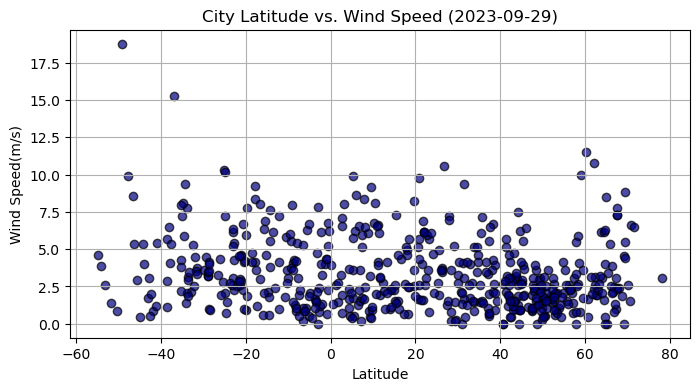

In [76]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 4))  # Set the size of the plot (optional)

# Create the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="navy", edgecolors="black", alpha=0.7)

# Add labels and a title
from datetime import datetime #today's date
# Get today's date
today_date = datetime.now().date()
# Format today's date as "YYYY-MM-DD"
formatted_date = today_date.strftime('%Y-%m-%d')

plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Add grid lines (optional)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4-JH.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [105]:
# Define a function to create Linear Regression plots
from sklearn.linear_model import LinearRegression

def linear_regression_plot(x, y):
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Reshape the input data if needed
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    
    # Fit the model to the data
    model.fit(x, y)
    
    # Predict y-values using the model
    y_pred = model.predict(x)
    
    # Extract the slope (m) and intercept (b) from the model to print the line equation
    slope = model.coef_[0]
    intercept = model.intercept_


    # Create a scatter plot of the data points
    plt.scatter(x, y, label='Data Points')
    
    # Plot the regression line
    plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression Line')
    
    
    
    # Print the equation of the linear regression line
    equation = f'Y = {slope:.2f}X + {intercept:.2f}'
    
    

    # Show the plot
    #plt.show()

    return equation

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,7.45,65,75,2.57,CA,2023-09-29 23:26:50
3,al qusayr,34.5091,36.5798,20.13,60,6,3.47,SY,2023-09-29 23:26:50
5,crane,31.3974,-102.3501,32.71,30,0,9.34,US,2023-09-29 23:26:50
6,hamilton,39.1834,-84.5333,23.46,77,0,1.54,US,2023-09-29 23:26:27
7,roxas,11.5853,122.7511,25.08,85,85,1.92,PH,2023-09-29 23:26:50


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carahue,-38.7000,-73.1667,9.80,91,0,1.14,CL,2023-09-29 23:26:49
2,ushuaia,-54.8000,-68.3000,9.81,46,0,4.63,AR,2023-09-29 23:26:50
4,edinburgh of the seven seas,-37.0676,-12.3116,10.58,85,100,15.26,SH,2023-09-29 23:26:50
15,adamstown,-25.0660,-130.1015,20.63,83,23,10.30,PN,2023-09-29 23:26:52
17,invercargill,-46.4000,168.3500,7.79,81,80,5.36,NZ,2023-09-29 23:26:52


###  Temperature vs. Latitude Linear Regression Plot

Correlation Coefficient: -0.8341914367243461


Text(10, 5, 'Y = -0.39X + 32.86')

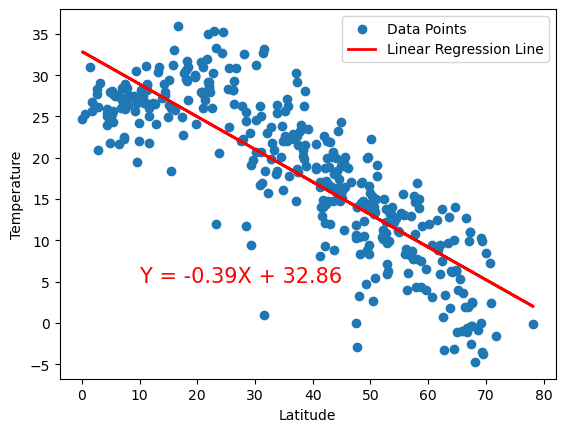

In [120]:
# Linear regression on Northern Hemisphere
#pearson coefficient
from scipy.stats import pearsonr
Correlation_coefficient, _ = pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
print(f'Correlation Coefficient: {Correlation_coefficient}')

equation = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
# Add labels and a legend
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.legend()

# Annotate the plot with the linear equation
plt.annotate(equation, (10, 5), fontsize=15, color="red")

Correlation Coefficient: 0.7860093628020488


Text(-25, 5, 'Y = 0.37X + 28.70')

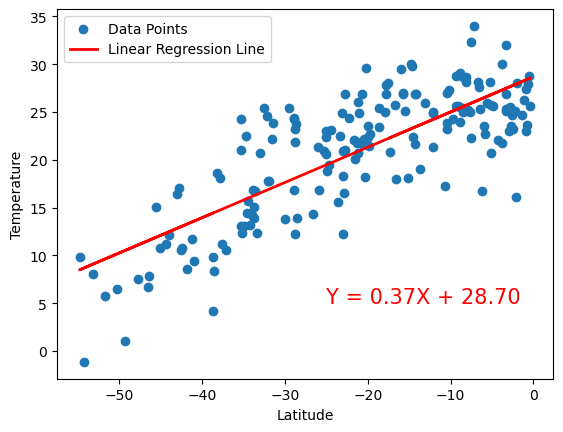

In [121]:
# Linear regression on Southern Hemisphere
#pearson coefficient
from scipy.stats import pearsonr
Correlation_coefficient, _ = pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
print(f'Correlation Coefficient: {Correlation_coefficient}')

equation = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Add labels and a legend
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.legend()

# Annotate the plot with the linear equation
plt.annotate(equation, (-25, 5), fontsize=15, color="red")

**Discussion about the linear relationship:** 

Northern emisphere

The correlation coefficient -0.8341914367243461 indicates a strong negative correlation between temperature and latitude, this means that as the coutry is away from the equator and closer to the north pole the temperature tends to decrease. 

Y = -0.39X + 32.86' this equation slope -0.39 indicates the temperature decreases aproximately 0.39 degrees for each unit of latitude increment. Also, the starting temperature is 32.86 degrees at latidue zero, at the equator.  

Southern emisphere

Conversely, the sourthern emisphere correlation coefficient 0.7860093628020488 indicates a strong positive correlation between temperature and latitude, this means that as the coutry is away from the south pole and closer to the equator the temperature tends to increase. 
Y = 0.37X + 28.70 this equation slope 0.37 indicates the temperature increases aproximately 0.37 degrees for each unit of latitude increment. Also, the starting temperature is 28.70 degrees at latidue zero closer to the south pole.  

### Humidity vs. Latitude Linear Regression Plot

Correlation Coefficient: 0.08327448816252159


Text(45, 25, 'Y = 0.08X + 71.26')

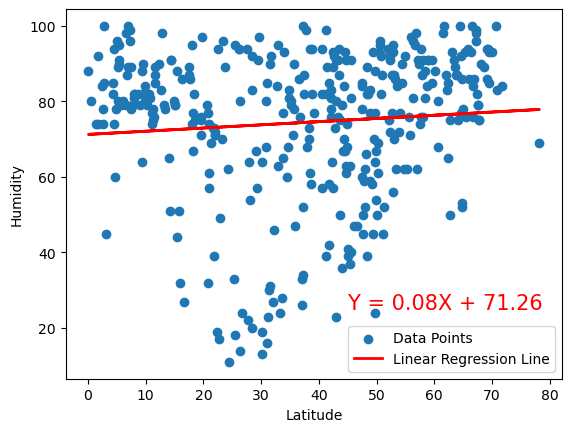

In [125]:
# Northern Hemisphere
#pearson coefficient
from scipy.stats import pearsonr
Correlation_coefficient, _ = pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print(f'Correlation Coefficient: {Correlation_coefficient}')

equation = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
# Add labels and a legend
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
# Annotate the plot with the linear equation
plt.annotate(equation, (45, 25), fontsize=15, color="red")

Correlation Coefficient: 0.22296471927740602


Text(-50, 20, 'Y = 0.08X + 71.26')

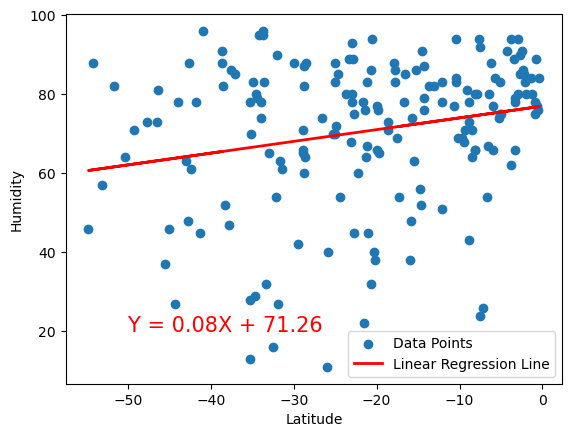

In [127]:
# Southern Hemisphere
#pearson coefficient
Correlation_coefficient, _ = pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print(f'Correlation Coefficient: {Correlation_coefficient}')

equiation = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Add labels and a legend
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
# Annotate the plot with the linear equation
plt.annotate(equation, (-50, 20), fontsize=15, color="red")

**Discussion about the linear relationship:** 

Northern emisphere

The Correlation Coefficient 0.08327448816252159 indicates a weak positive correlation between humidity and latitude in the Northern Hemisphere. This means, there is a slight tendency for humidity to increase as you move northwards the equator.  

According to this equation (Y = 0.08X + 71.26), the humidity (Y) increases by approximately 0.08 percentage points for each unit increase in latitude (X), and it starts at a base humidity level of 71.26%.

Southern emisphere

The correlation coefficient of 0.223 indicates a weak positive correlation between humidity and latitude in the Southern Hemisphere. So, there is a slight tendency for humidity to increase.
According to this equation(Y = 0.08X + 71.26), the humidity (Y) increases by approximately 0.08 percentage points for each unit increase in latitude (X), and it starts at a base humidity level of 71.26%.

### Cloudiness vs. Latitude Linear Regression Plot

Correlation Coefficient: 0.09314999570612324


Text(45, 25, 'Y = 0.18X + 50.41')

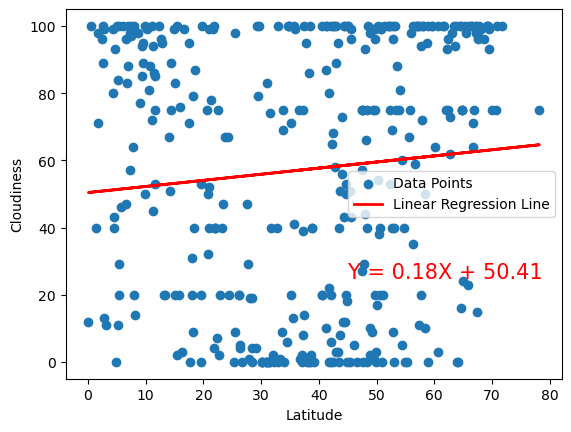

In [129]:
# Northern Hemisphere
Correlation_coefficient, _ = pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print(f'Correlation Coefficient: {Correlation_coefficient}')

equation = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Add labels and a legend
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#plt.legend()


# Annotate the plot with the linear equation
plt.annotate(equation, (45, 25), fontsize=15, color="red")

Correlation Coefficient: 0.14497701254838408


Text(-55, 45, 'Y = 0.38X + 56.71')

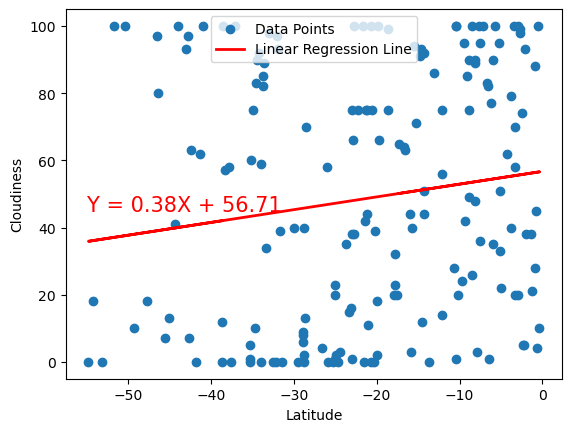

In [136]:
# Southern Hemisphere
Correlation_coefficient, _ = pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print(f'Correlation Coefficient: {Correlation_coefficient}')

equation = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Add labels and a legend
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#plt.legend()


# Annotate the plot with the linear equation
plt.annotate(equation, (-55, 45), fontsize=15, color="red")

**Discussion about the linear relationship:**
Cloudiness vs. Latitude

Northern emisphere

The positive correlation coefficient suggests a tendency for cloudiness to increase as you move northward in the Northern Hemisphere. However, this relationship is weak.

According to this equation (Y = 0.18X + 50.41), cloudiness (Y) increases by approximately 0.18 units for each unit increase in latitude (X), and it starts at a base cloudiness level of 50.41%.

Southern emisphere

The correlation coefficient of 0.145 suggests a weak positive correlation between cloudiness and latitude in the Southern Hemisphere.

According to this equation (Y = 0.38X + 56.71), cloudiness (Y) increases by approximately 0.38 units for each unit increase in latitude (X), and it starts at a base cloudiness level of 56.71%.

### Wind Speed vs. Latitude Linear Regression Plot

Correlation Coefficient: -0.11056406074177746


Text(40, 10, 'Y = -0.01X + 3.49')

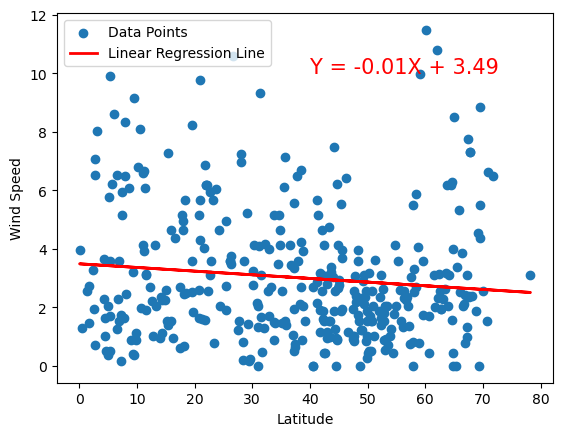

In [139]:
# Northern Hemisphere
Correlation_coefficient, _ = pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print(f'Correlation Coefficient: {Correlation_coefficient}')

equation = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Add labels and a legend
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#plt.legend()


# Annotate the plot with the linear equation
plt.annotate(equation, (40, 10), fontsize=15, color="red")

Correlation Coefficient: -0.18447800605158446


Text(-55, 12, 'Y = -0.04X + 3.09')

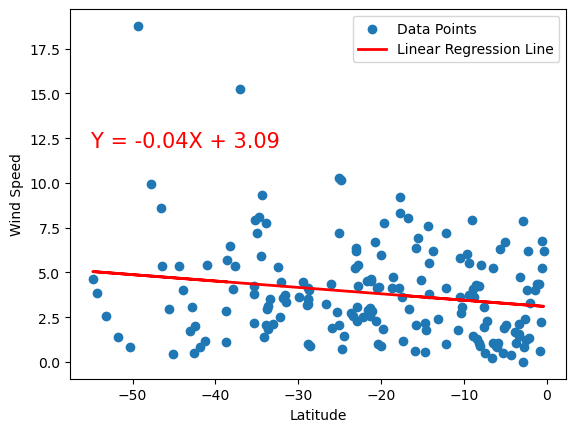

In [137]:
# Southern Hemisphere
# Southern Hemisphere
Correlation_coefficient, _ = pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print(f'Correlation Coefficient: {Correlation_coefficient}')

equation = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Add labels and a legend
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#plt.legend()


# Annotate the plot with the linear equation
plt.annotate(equation, (-55, 12), fontsize=15, color="red")

**Discussion about the linear relationship:** 

Wind Speed vs. Latitude

Northern emisphere

The correlation coefficient of -0.111 indicates a very weak negative correlation between wind speed and latitude in the Northern Hemisphere. This suggests that latitude alone is not a strong predictor of wind speed.

According to this equation(Y = -0.01X + 3.49), wind speed (Y) decreases by approximately 0.01 units for each unit increase in latitude (X), and it starts at a base wind speed level of 3.49 units.


Wind Speed vs. Latitude
Southern emisphere

The correlation coefficient of -0.184 indicates a weak negative correlation between wind speed and latitude in the Southern Hemisphere. The correlation suggested that latitude alone is not a strong predictor of wind speed.

According to this equation(Y = -0.04X + 3.09), wind speed (Y) decreases by approximately 0.04 units for each unit increase in latitude (X), and it starts at a base wind speed level of 3.09 units.

